In [29]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from numpy import concatenate
from sklearn.metrics import mean_squared_error

In [30]:
# read in the data
df = pd.read_csv("./../data/supervised_1_1.csv")

In [31]:
df.set_index('date', inplace=True)
print(df.shape)
df.head()

(7115050, 19)


,e5gas,weekday,latitude,longitude,dautobahn,autobahn,aral,esso,jet,shell,total,rotterdam,brent,wti,eurusd,vehicles,state,station,num_days
date,,,,,,,,,,,,,,,,,,,
2014-05-16,1.536647,5,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.622837,109.424042,101.258553,1.369886,15211.0,10,0,0
2014-05-17,1.564000,6,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.622486,109.699997,101.669998,1.369580,9146.0,10,0,1
2014-05-18,1.569417,0,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.622136,109.699997,101.669998,1.369580,9843.0,10,0,2
2014-05-19,1.578167,1,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.621785,109.838928,102.008537,1.370161,13502.0,10,0,3
2014-05-20,1.599000,2,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.620475,109.522926,102.058907,1.368282,12876.0,10,0,4


In [32]:
# try removing the averages so as to not include endogenous variables on the rigth hand side
df.drop(['eurusd', 'vehicles'], axis=1, inplace=True)
print(df.shape)
df.head()

(7115050, 17)


,e5gas,weekday,latitude,longitude,dautobahn,autobahn,aral,esso,jet,shell,total,rotterdam,brent,wti,state,station,num_days
date,,,,,,,,,,,,,,,,,
2014-05-16,1.536647,5,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.622837,109.424042,101.258553,10,0,0
2014-05-17,1.564000,6,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.622486,109.699997,101.669998,10,0,1
2014-05-18,1.569417,0,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.622136,109.699997,101.669998,10,0,2
2014-05-19,1.578167,1,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.621785,109.838928,102.008537,10,0,3
2014-05-20,1.599000,2,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.620475,109.522926,102.058907,10,0,4


In [33]:
# replace the oil prices for the last 30 days with the predictions
oil = pd.read_csv('./../data/linear_oil_yhat.csv')

last_30 = ['2015-11-11', '2015-11-13', '2015-11-14', '2015-11-15', '2015-11-16', '2015-11-17', '2015-11-18',
          '2015-11-19', '2015-11-20', '2015-11-21', '2015-11-22', '2015-11-23', '2015-11-24', '2015-11-25',
          '2015-11-26', '2015-11-27', '2015-11-28', '2015-11-29', '2015-11-30', '2015-12-01', '2015-12-02',
          '2015-12-03', '2015-12-04', '2015-12-05', '2015-12-06', '2015-12-07', '2015-12-08', '2015-12-09',
          '2015-12-10', '2015-12-10']

for index, date in enumerate(last_30):
    df.loc[date, 'rotterdam'] = oil['rot_yhat'][index]
    df.loc[date, 'brent'] = oil['brent_yhat'][index]
    df.loc[date, 'wti'] = oil['wti_yhat'][index]

In [34]:
values = df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
reframed = pd.DataFrame(scaler.fit_transform(values))
# frame as supervised learning
# n_lag = 1
# n_seq = 1
# reframed = series_to_supervised(scaled, n_lag, n_seq)
# drop the values from the final day for each station
# var21(t-1) with global and state mean and eurusd and vehicles
# reframed = reframed[reframed['var17(t-1)'] != 1]
# drop columns we don't want to predict
# (22,42) with global and state mean
# reframed.drop(reframed.columns[list(range(18,34))], axis=1, inplace=True)
# reframed.drop(reframed.columns[list(range(23,43))], axis=1, inplace=True) <-- this might be wrong, used for t=2
reframed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.398580,0.833333,0.499847,0.451308,0.231638,0.0,0.0,0.0,0.0,0.0,0.0,0.837361,0.930292,0.921895,0.384615,0.0,0.000000
1,0.415691,1.000000,0.499847,0.451308,0.231638,0.0,0.0,0.0,0.0,0.0,0.0,0.836386,0.933953,0.927822,0.384615,0.0,0.001742
2,0.419080,0.000000,0.499847,0.451308,0.231638,0.0,0.0,0.0,0.0,0.0,0.0,0.835411,0.933953,0.927822,0.384615,0.0,0.003484
3,0.424554,0.166667,0.499847,0.451308,0.231638,0.0,0.0,0.0,0.0,0.0,0.0,0.834437,0.935795,0.932700,0.384615,0.0,0.005226
4,0.437586,0.333333,0.499847,0.451308,0.231638,0.0,0.0,0.0,0.0,0.0,0.0,0.830794,0.931604,0.933425,0.384615,0.0,0.006969


In [35]:
# split into train and test sets
# now order needs to be by day rather than by station -- reorder by num_days
# num_days is 16 and 15 is station
reframed.sort_values(by=[16, 15], inplace=True)
day_30 = reframed[16].unique()[-30]
train = reframed.loc[reframed[16] < day_30]
test = reframed.loc[reframed[16] >= day_30]

In [36]:
n_seq = 1
train_values = train.values
test_values = test.values
# split into input and outputs
train_X, train_y = train_values[:, n_seq:], train_values[:, :n_seq]
test_X, test_y = test_values[:, n_seq:], test_values[:, :n_seq]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(6743830, 16) (6743830, 1) (371220, 16) (371220, 1)


In [37]:
# fit model
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
# make a prediction
yhat = model.predict(test_X)

In [39]:
# invert scaling for forecast
yhat = yhat.reshape((len(yhat), 1))
inv_yhat = concatenate((yhat, test_X[:, 0:]), axis=1)
print(inv_yhat.shape)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 0:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

(371220, 17)
Test RMSE: 0.035


In [12]:
# now try without the scaling
df.head()

,e5gas,weekday,latitude,longitude,dautobahn,autobahn,aral,esso,jet,shell,total,rotterdam,brent,wti,state,station,num_days
date,,,,,,,,,,,,,,,,,
2014-05-16,1.536647,5,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.622837,109.424042,101.258553,10,0,0
2014-05-17,1.564000,6,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.622486,109.699997,101.669998,10,0,1
2014-05-18,1.569417,0,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.622136,109.699997,101.669998,10,0,2
2014-05-19,1.578167,1,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.621785,109.838928,102.008537,10,0,3
2014-05-20,1.599000,2,51.157501,10.0002,14850.392578,0,0,0,0,0,0,0.620475,109.522926,102.058907,10,0,4


In [15]:
df.sort_values(by=['num_days', 'station'], inplace=True)
day_30 = df['num_days'].unique()[-30]
print(day_30)
train = df.loc[df['num_days'] < day_30]
test = df.loc[df['num_days'] >= day_30]

545


In [24]:
n_seq = 1
train_values = train.values
test_values = test.values
# split into input and outputs
train_X, train_y = train_values[:, n_seq:], train_values[:, :n_seq]
test_X, test_y = test_values[:, n_seq:], test_values[:, :n_seq]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(6743830, 16) (6743830, 1) (371220, 16) (371220, 1)


In [25]:
# fit model
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
# make a prediction
yhat = model.predict(test_X)

In [27]:
# calculate RMSE
rmse = sqrt(mean_squared_error(test_y, yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.035


In [28]:
yhat[:10]

array([[1.3321211 ],
       [1.31717424],
       [1.33617391],
       [1.36949954],
       [1.33412807],
       [1.31708914],
       [1.33679772],
       [1.36796364],
       [1.32690757],
       [1.32678472]])

In [48]:
test[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
545,0.265555,0.666667,0.499847,0.451308,0.231638,0.0,0.0,0.0,0.0,0.0,0.0,0.119264,0.091623,0.0869,0.384615,0.000000,0.949477
1120,0.255650,0.666667,0.815177,0.451330,0.008403,0.0,0.0,0.0,1.0,0.0,0.0,0.119264,0.091623,0.0869,0.346154,0.000068,0.949477
1695,0.290056,0.666667,0.197784,0.451341,0.188875,0.0,0.0,0.0,0.0,0.0,0.0,0.119264,0.091623,0.0869,0.038462,0.000136,0.949477
2270,0.321074,0.666667,0.333565,0.451485,0.004218,0.0,0.0,0.0,0.0,1.0,0.0,0.119264,0.091623,0.0869,0.115385,0.000204,0.949477
2845,0.308563,0.666667,0.317747,0.451540,0.053021,0.0,0.0,0.0,0.0,0.0,0.0,0.119264,0.091623,0.0869,0.115385,0.000272,0.949477
3420,0.261645,0.666667,0.833959,0.451540,0.066024,0.0,0.0,0.0,1.0,0.0,0.0,0.119264,0.091623,0.0869,0.346154,0.000340,0.949477
3995,0.258777,0.666667,0.130535,0.451562,0.096657,0.0,0.0,0.0,0.0,0.0,0.0,0.119264,0.091623,0.0869,0.115385,0.000408,0.949477
4570,0.308823,0.666667,0.619555,0.451595,0.135221,0.0,1.0,0.0,0.0,0.0,0.0,0.119264,0.091623,0.0869,0.500000,0.000476,0.949477
5145,0.250176,0.666667,0.839885,0.451639,0.061610,0.0,0.0,0.0,0.0,0.0,0.0,0.119264,0.091623,0.0869,0.807692,0.000544,0.949477
5720,0.265555,0.666667,0.129801,0.451705,0.094617,0.0,0.0,0.0,1.0,0.0,0.0,0.119264,0.091623,0.0869,0.115385,0.000612,0.949477


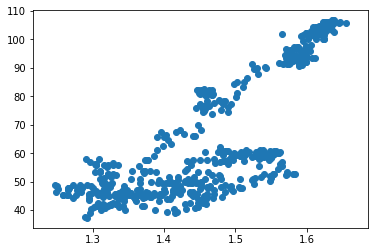

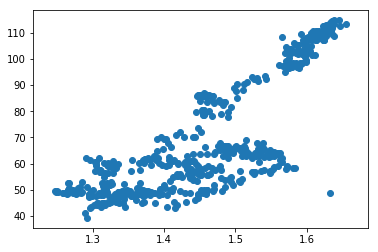

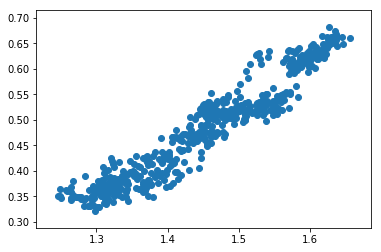

In [47]:
from matplotlib import pyplot as plt
plt.scatter(df[df['station'] == 201]['e5gas'], df[df['station'] == 200]['wti'])
plt.show()

plt.scatter(df[df['station'] == 201]['e5gas'], df[df['station'] == 200]['brent'])
plt.show()

plt.scatter(df[df['station'] == 201]['e5gas'], df[df['station'] == 200]['rotterdam'])
plt.show()

In [49]:
model.coef_

array([[-1.55224663e-03, -8.49223137e-03,  3.10523435e-03,
         1.84410065e-03,  3.28010283e-02,  2.36334018e-02,
         7.78038427e-03, -6.26620278e-03,  2.23531052e-02,
         1.74711905e-02,  1.98251292e-01, -4.87676263e-03,
         5.82724474e-02, -1.42067671e-04, -2.25330144e-03,
         4.43549715e-02]])

In [53]:
coef = pd.DataFrame(model.coef_, columns=['weekday', 'latitude', 'longitude', 'dautobahn', 'autobahn', 'aral', 'esso', 'jet', 'shell', 'total', 'rotterdam', 'brent', 'wti', 'state', 'station', 'num_days'])

In [54]:
coef

,weekday,latitude,longitude,dautobahn,autobahn,aral,esso,jet,shell,total,rotterdam,brent,wti,state,station,num_days
0,-0.001552,-0.008492,0.003105,0.001844,0.032801,0.023633,0.00778,-0.006266,0.022353,0.017471,0.198251,-0.004877,0.058272,-0.000142,-0.002253,0.044355


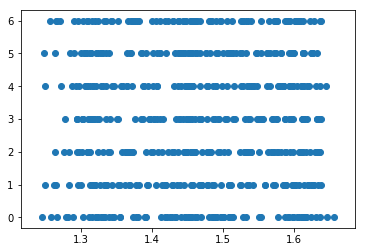

In [55]:
plt.scatter(df[df['station'] == 201]['e5gas'], df[df['station'] == 200]['weekday'])
plt.show()